# Import Functions and Set Directories

In [3]:
# required package versions can be found in requirements_bal.txt

import rushd as rd
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation


import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:

experimentdir1 = rd.datadir/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.03.24_DIAL' # Rep GibCre for 380bp
experimentdir2 = rd.datadir/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.04.14_DIAL' # Rep modRNA for 380+610bp
experimentdir3 = rd.datadir/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.04.28_DIAL' # Rep modRNA and GibCre for 380bp
experimentdir4 = rd.datadir/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.05.12_DIAL' # 2 Reps of modRNA and GibCre for 380+610bp

outputdir = rd.rootdir/'flow_analysis_scripts'/'2025_DIAL_paper_upload'/'figs_2024_promoter_editing_paper/fig6/'

# if this does not work then run the alternative way to set the directories in the cell below

In [1]:
# Sneha's other option for setting directories (uncomment if prior cell does not work)
# import functions_paper_1
# import importlib
# from functions_paper_1 import *
# exec(open("functions_paper_1.py").read())
# datadir_alt = Path(Path('../../datadir_srk.txt').read_text())
# experimentdir1 = datadir_alt/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.03.24_DIAL' # Rep GibCre for 380bp
# experimentdir2 = datadir_alt/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.04.14_DIAL' # Rep modRNA for 380+610bp
# experimentdir3 = datadir_alt/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.04.28_DIAL' # Rep modRNA and GibCre for 380bp
# experimentdir4 = datadir_alt/'instruments'/'data'/'attune'/'Brittany_attune'/'2025.05.12_DIAL' # 2 Reps of modRNA and GibCre for 380+610bp

# #outputdir = rd.rootdir/'flow_analysis_scripts'/'2025_DIAL_paper_upload'/'figs_2024_promoter_editing_paper/fig6/'

SyntaxError: invalid syntax (<ipython-input-1-dedc2278c8f5>, line 12)

In [3]:
# rd.plot.plot_well_metadata(experimentdir4/'metadata_controls.yaml')
# rd.plot.plot_well_metadata(experimentdir4/'metadata_GibCre_RepA.yaml')
# rd.plot.plot_well_metadata(experimentdir4/'metadata_modRNA_RepA.yaml')


# Load Data

In [7]:
data_columns = ['CTFR-A','GFP-A','mCherry-A','TagBFP-A']

# If the columns input is not working, then you can comment it out as shown. 

# 2025.03.24 Rep of GibCre for 380bp
df1a = rd.flow.load_csv_with_metadata(data_path=experimentdir1/'csv_5dpi',yaml_path=experimentdir1/'metadata_v2.yaml')
df1b = rd.flow.load_csv_with_metadata(data_path=experimentdir1/'csv_5dpi_controls',yaml_path=experimentdir1/'metadata_controls_v2.yaml')
df1 = pd.concat([df1a,df1b])
df1['rep'] = '2025.03.24'
df1 = df1[~df1.ZF.isin(['Halo-ZF37-ctlr','Halo Stain','Halo Ligand Only'])] # Get rid of unnecessary conditions

# 2025.04.14 Rep of modRNA for 380+610bp
df2a = rd.flow.load_csv_with_metadata(data_path=experimentdir2/'csv_5dpi_PGK',yaml_path=experimentdir2/'metadata_PGK_v2.yaml'
                                      ,columns=data_columns
                                      )
df2b = rd.flow.load_csv_with_metadata(data_path=experimentdir2/'csv_5dpi_controls',yaml_path=experimentdir2/'metadata_controls_v2.yaml'
                                      ,columns=data_columns
                                      )
df2 = pd.concat([df2a,df2b])
df2['rep'] = '2025.04.14'

# 2025.4.28 Rep of modRNA and GibCre for 380bp
df3a = rd.flow.load_csv_with_metadata(data_path=experimentdir3/'csv_5dpi_controls',yaml_path=experimentdir3/'metadata_controls.yaml'
                                      ,columns=data_columns
                                      )
df3b = rd.flow.load_csv_with_metadata(data_path=experimentdir3/'csv_5dpi_mCh-RAS_modRNA',yaml_path=experimentdir3/'metadata_mCh-RAS_modRNA.yaml'
                                      ,columns=data_columns
                                      )
df3c = rd.flow.load_csv_with_metadata(data_path=experimentdir3/'csv_5dpi_mCh-RAS_GibCre',yaml_path=experimentdir3/'metadata_mCh-RAS_GibCre.yaml'
                                      ,columns=data_columns
                                      )
df3 = pd.concat([df3a,df3b,df3c])
df3['rep'] = '2025.04.28'

# 2 Reps of modRNA and GibCre for 380+610bp
df4a = rd.flow.load_csv_with_metadata(data_path=experimentdir4/'csv_5dpi_controls',yaml_path=experimentdir4/'metadata_controls.yaml'
                                      ,columns=data_columns
                                      )
df4b = rd.flow.load_csv_with_metadata(data_path=experimentdir4/'csv_5dpi_modRNA_RepA',yaml_path=experimentdir4/'metadata_modRNA_RepA.yaml'
                                      ,columns=data_columns
                                      )
df4c = rd.flow.load_csv_with_metadata(data_path=experimentdir4/'csv_5dpi_modRNA_RepB',yaml_path=experimentdir4/'metadata_modRNA_RepB.yaml'
                                      ,columns=data_columns
                                      )
df4d = rd.flow.load_csv_with_metadata(data_path=experimentdir4/'csv_5dpi_GibCre_RepA',yaml_path=experimentdir4/'metadata_GibCre_RepA.yaml'
                                      ,columns=data_columns
                                      )
df4e = rd.flow.load_csv_with_metadata(data_path=experimentdir4/'csv_5dpi_GibCre_RepB',yaml_path=experimentdir4/'metadata_GibCre_RepB.yaml'
                                      ,columns=data_columns
                                      )
df4 = pd.concat([df4a,df4b,df4c,df4d,df4e])

df = pd.concat([df1,df2,df3,df4])


Make condition names

In [8]:
df['condition_all'] = df['reporter'] + ' ' + df['ZF'] + ' ' + df['cre'] + ' ' + df['gib']+ ' ' + df['reprogramming']
df['cre, gib'] = df['cre'] + ', ' + df['gib']
df['ZF, cre'] = df['ZF'] + ', ' + df['cre']
df['ZF, cre, gib'] = df['ZF'] + ', ' + df['cre'] + ', ' + df['gib']
df['reporter, ZF, cre, gib'] = df['reporter'] + ', ' + df['ZF'] + ', ' + df['cre'] + ', ' + df['gib']
df['reporter, ZF, cre'] = df['reporter'] + ', ' + df['ZF'] + ', ' + df['cre']

Get rid of negative values

In [9]:
df = df.astype({'GFP-A': 'float64', 'TagBFP-A': 'float64','mCherry-A':'float64','CTFR-A':'float64'}) # for some reason I'm having unusual trouble with datatypes and this fixes it

for i in np.arange(0,np.size(data_columns)):
    df = df.loc[df[data_columns[i]]>0]


# Gating

## iMN gate

In [14]:
iMN_gate = 8 * 10**3 # Set gate

ValueError: cannot reindex from a duplicate axis

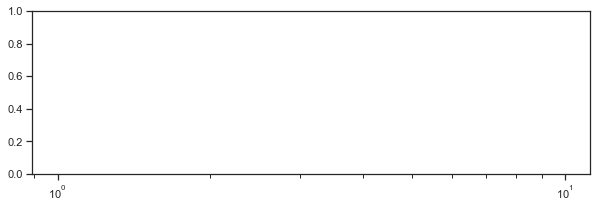

In [ ]:
sns.set_theme(style="ticks",font_scale=1)

condition_list = ['none','mCh-RAS(YBTATA, 610bp)','mCh-RAS(YBTATA, 380bp)','mCh-RAS(YBcon)']
slice = df[( (df['reporter'].isin(condition_list)) & (df['ZF'] == 'PGK-ZF37-BFP') ) | (df['reporter'] == 'none') ]

# Plot gate
plt.figure(figsize=(10,3))
g = sns.kdeplot(data=slice.sample(10000),x='GFP-A',hue='reporter',log_scale=True,common_norm=False,linewidth=3,hue_order=condition_list)
plt.axvline(x=iMN_gate,linestyle='--',color='black',linewidth=2)
#sns.move_legend(g, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.tight_layout()
plt.show()

## CTFR gate

In [13]:
CTFR_gates = {}

for i in df.rep.unique():
    CTFR_gates[i] = df[(df['reprogramming'] == 'Puro_CTFR') & (df['rep'] == i)]['CTFR-A'].quantile(0.2)


# Plotting Functions

In [15]:
sns.set_theme(style="ticks",font='Arial',font_scale=1)
plt.rcParams['font.family'] = 'Arial'

def SK_dotplot( x, y, hue, data,pairs=[], palette = 'muted', order=None, hue_order =None, plottitle="",savetitle = '',
                 save_fig=False, dodge=True,x_rot=0, scientific=True,yscale="linear",y_ax_k=False, stat_text = 'star', 
                 ylim=False,aspect=None, plot_reps=True, join=False,
                 xlabel = 'Default', ylabel = 'Default', legend=True, xticklabels=True,
                 type = 'pointplot', figsize = None, markers='o', pointplot_settings='old',
                 fontsize=False, axis_lines={'top': False, 'bottom': True, 'left': True, 'right': False},capsize=True,subfolder=False):


        if aspect != None:
            g, ax = plt.subplots()
            ax.set_box_aspect(aspect)
            #plt.rc('ytick', labelsize=15) 
        if figsize != None:
            plt.figure(figsize=figsize)

        #plot all of the replicates of each condtion
        if plot_reps == True:
            g = sns.stripplot(data=data, x=x, y=y,hue=hue, dodge = dodge, alpha=0.2, palette=palette,size=4,hue_order=hue_order, order=order)

        #Add in the means 
        #sns.barplot(x="reporter", y="eGFP-A_gmean",hue='rec', data=s, estimator=np.mean,capsize=.1,alpha=0.2,errwidth=2,errcolor='gray')
        if dodge == True and hue is not None:
            n_hue_levels = len(data[hue].unique())
            if n_hue_levels > 1:
                dodge_amt = 0.5
            else:
                dodge_amt = False
        elif dodge == True and hue is None:
            dodge_amt = 0.5
        else:
            dodge_amt = False

        if type == 'pointplot':
            if pointplot_settings == 'new':
                g = sns.pointplot(x=x, y=y,hue=hue, data=data, estimator=np.mean, 
                            errorbar='se', capsize=0,errwidth=0.75, join=join,scale=0.75, dodge = dodge_amt , 
                            palette=palette,hue_order=hue_order, order=order, markers=markers)
            #Old pointpolt settings
            if pointplot_settings == 'old':
                g = sns.pointplot(x=x, y=y,hue=hue, data=data, estimator=np.mean, 
                    errorbar='se', capsize=.18,errwidth=.75, join=join, markers=markers,scale=.75, dodge = dodge_amt , 
                    palette=palette,hue_order=hue_order, order=order)
            
            if legend==False:
                g.get_legend().remove()
             

        if type == 'barplot':
            g = sns.barplot(x=x, y=y, hue=hue, data=data, estimator=np.mean,
                            errorbar='se', capsize=.1,errwidth=1, dodge = dodge_amt , 
                    palette=palette, hue_order=hue_order, order=order, alpha = 0.7,markers=markers)
        
        
        if (legend==True and hue != None):
            leg = g.legend(title="Condition", loc="upper left",
               bbox_to_anchor=(1, 1), frameon=False)
    
        
        #rotate the x-labels
        # labels = g.get_xticklabels()
        if order != None:
            labels = [ '\n('.join(l.split('(')) for l in order]
            labels = [ '\n'.join(l.split(' ')) for l in labels]
        if xticklabels == False:
            labels = []
        g.set_xticklabels(labels=labels, rotation=x_rot, horizontalalignment='center' if x_rot==0 else 'right')



        #set the y-scale
        plt.yscale(yscale)

        #Set ylim
        ax=plt.gca()
        if ylim != False:
            ax.set_ylim(ymin=ylim[0], ymax=ylim[1])

        #make scientific axes 
        if scientific != False:
            if yscale == "linear":
                plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

        ymin, ymax = ax.get_ylim()
        if y_ax_k != False and ymax>1000:
            k_formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f'{x:.0f}' if abs(x) < 1000 else f'{x/1000:.0f}k')
            ax.yaxis.set_major_formatter(k_formatter)

        #Add in the T-tests
        if len(pairs)>0:
            add_stat_annotation(g, data=data, x=x, y=y,hue=hue,
                        box_pairs=pairs, order=order, hue_order=hue_order,
                        test='t-test_ind', text_format=stat_text, loc='inside', verbose=2, 
                        comparisons_correction= None)
        
        #set x-label and y-label 
        xl = xlabel; yl = ylabel; 
        if xlabel == 'Default': 
             xl = x
        if ylabel == 'Default': 
             yl = y
        plt.xlabel(xl)  # Adjust x-axis label
        plt.ylabel(yl)  # Adjust y-axis label

        if fontsize != False: 
            g.set_xlabel(xl, fontsize=fontsize)  # Adjust the font size of x-axis label
            g.set_ylabel(yl, fontsize=fontsize)  # Adjust the font size of y-axis label
            #set ticks 
            g.tick_params(axis='both', labelsize=fontsize,length=5)  # Adjust the font size of tick labels and tick lengths

        plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.25) # make all plots have the same area

        plt.title(plottitle)
        g.spines['top'].set_visible(True)
        g.spines['right'].set_visible(True)
        g.spines['bottom'].set_visible(True)
        g.spines['left'].set_visible(True)

        if not axis_lines['top']:
            g.spines['top'].set_visible(False)
        if not axis_lines['right']:
            g.spines['right'].set_visible(False)
        if not axis_lines['bottom']:
            g.spines['bottom'].set_visible(False)
        if not axis_lines['left']:
            g.spines['left'].set_visible(False)
        
        plt.show(g)

        # adjust figure size to accommodate all axes decorations
        plt.tight_layout()

        #save figure
       
        h = g.get_figure()
        if save_fig==True:
                if subfolder == False:
                    h.savefig(outputdir/str(savetitle + '.svg'),dpi=300)
                else:
                    h.savefig(outputdir/subfolder/str(savetitle + '.svg'),dpi=300)
        return g

# Summary Stats - All Cells

In [ ]:
groups = ['rep','reprogramming','reporter','ZF','cre','gib','well','condition_all',
          'cre, gib','ZF, cre','ZF, cre, gib','reporter, ZF, cre, gib','reporter, ZF, cre'] # 'rep' must be first group!!!!


def percent_hyperP(x):
    rep = x.name[0]  # Assuming 'rep' is the first group
    gate_value = CTFR_gates[rep]
    return np.mean(x < gate_value) * 100

def total_hyperP(x):
    rep = x.name[0]  # Assuming 'rep' is the first group
    gate_value = CTFR_gates[rep]
    return np.sum(x < gate_value)

# Create the summary dataframe
summary_df = pd.concat([
    df.groupby(groups)['CTFR-A'].apply(percent_hyperP).rename('(%) HyperP'),
    df.groupby(groups)['CTFR-A'].apply(total_hyperP).rename('(#) Total HyperP'),
    df.groupby(groups)['GFP-A'].apply(lambda x: np.size(x)).rename('Total Cell Count'),
    df.groupby(groups)['mCherry-A'].apply(scipy.stats.gmean).rename('mCherry MFI'),
    df.groupby(groups)['GFP-A'].apply(lambda x: np.mean(x > iMN_gate)*100).rename('(%) iMN\nof all cells'),
    df.groupby(groups)['GFP-A'].apply(lambda x: np.sum(x > iMN_gate)).rename('iMN Yield'),
    df.groupby(groups)['GFP-A'].apply(lambda x: np.sum(x > iMN_gate)/5000 * 100).rename('(%) iMN yield\nper MEF plated')
], axis=1)
summary_df = summary_df.reset_index()

In [ ]:
summary_df.to_csv('Fig6_ZF-DIAL_MEFs_5dpi.csv',index=False)

In [ ]:
bar2plot = ['(%) HyperP','(#) Total HyperP','Total Cell Count']#,'(%) iMN\nof all cells','(%) iMN yield\nper MEF plated']
dot2plot = ['mCherry MFI']

savedict = {'mCherry MFI':'mCherry MFI',
            'Total Cell Count':'Total Cell Count',
            '(%) iMN\nof all cells':'(%) iMN of all cells',
            '(%) iMN yield\nper MEF plated':'(%) iMN yield per MEF plated',
            '(%) iMN\nof ZF+':'(%) iMN of ZF+',
            '(#) ZF+ Cells':'(#) ZF+ Cells',
            '(%) iMN of ZF+ cells':'(%) iMN of ZF+ cells',
            'iMN Yield':'iMN Yield',
            '(%) HyperP':'(%) HyperP','(#) Total HyperP':'(#) Total HyperP',
            'mCh-RAS(YBcon)':'YBcon',
            'mCh-RAS(YBTATA, 380bp)':'380bp',
            'mCh-RAS(YBTATA, 610bp)':'610bp',
            '(%) HyperP\nNormalized':'(%) HyperP Normalized',
            '(#) Total HyperP\nNormalized':'(#) Total HyperP Normalized',
            'mCherry MFI\nNormalized':'mCherry MFI Normalized',
            'Total Cell Count\nNormalized':'Total Cell Count Normalized',
            '(%) iMN\nof all cells Normalized':'(%) iMN of all cells Normalized',
            '(%) iMN yield\nper MEF plated Normalized':'(%) iMN yield per MEF plated Normalized',}

#mod_reps2plot = ['2025.04.14', '2025.04.28', '2025.05.12_A', '2025.05.12_B']
mod_reps2plot = ['2025.04.28', '2025.05.12_A', '2025.05.12_B']

gib_reps2plot = ['2025.03.24', '2025.04.28', '2025.05.12_A', '2025.05.12_B']

# Plot results for all cells

## modRNA Results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=3.580e-09 stat=-7.877e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=9.432e-01 stat=-7.180e-02


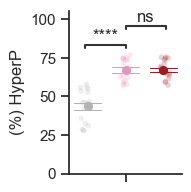

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=4.064e-11 stat=-9.519e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=4.123e-01 stat=-8.301e-01


<Figure size 640x480 with 0 Axes>

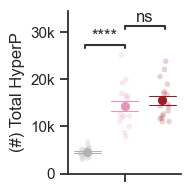

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.385e-06 stat=-5.841e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=5.375e-01 stat=-6.229e-01


<Figure size 640x480 with 0 Axes>

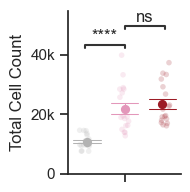

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=7.841e-14 stat=-1.206e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.795e-01 stat=1.371e+00


<Figure size 640x480 with 0 Axes>

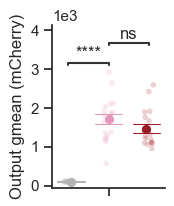

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.620e-06 stat=-5.628e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.262e-02 stat=-2.388e+00


<Figure size 640x480 with 0 Axes>

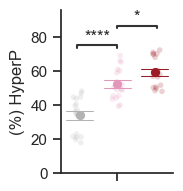

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=6.355e-11 stat=-9.349e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=4.365e-03 stat=-3.054e+00


<Figure size 640x480 with 0 Axes>

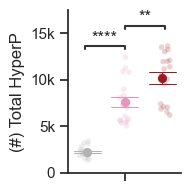

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=9.083e-08 stat=-6.758e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.286e-01 stat=-1.558e+00


<Figure size 640x480 with 0 Axes>

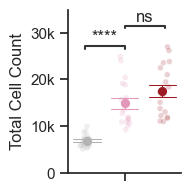

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.499e-11 stat=-9.902e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.613e-05 stat=-5.021e+00


<Figure size 640x480 with 0 Axes>

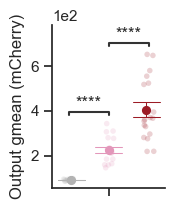

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.636e-07 stat=-7.295e+00
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.580e-02 stat=-1.936e+00


<Figure size 640x480 with 0 Axes>

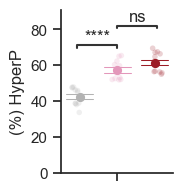

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=5.489e-08 stat=-8.035e+00
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.313e-01 stat=-4.866e-01


<Figure size 640x480 with 0 Axes>

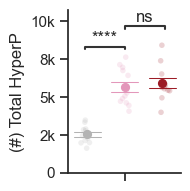

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=6.290e-08 stat=-7.969e+00
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.791e-01 stat=4.193e-01


<Figure size 640x480 with 0 Axes>

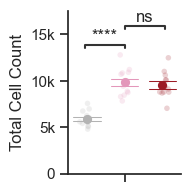

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.299e-12 stat=-1.429e+01
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=4.836e-02 stat=-2.090e+00


<Figure size 640x480 with 0 Axes>

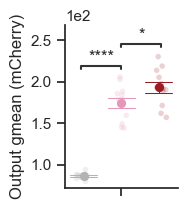

<Figure size 640x480 with 0 Axes>

In [ ]:
# modRNA results, mCh-RAS

order = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)','mCh-RAS(YBTATA, 610bp)']
hue_order = ['No ZF, NoCre','PGK-ZF37-BFP, modeeBxb1','PGK-ZF37-BFP, modPuroCre']
palette = { 'No ZF, NoCre':'#b3b3b3', 'PGK-ZF37-BFP, modeeBxb1':'#E397BA', 'PGK-ZF37-BFP, modPuroCre':'#9C1C26'}

pairs = [(('mCh-RAS(YBcon)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBcon)','PGK-ZF37-BFP, modPuroCre')),
          (('mCh-RAS(YBTATA, 380bp)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBTATA, 380bp)','PGK-ZF37-BFP, modPuroCre')),
          (('mCh-RAS(YBTATA, 610bp)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBTATA, 610bp)','PGK-ZF37-BFP, modPuroCre'))]

for reporter in order:
    pairs = [((reporter,'No ZF, NoCre'),(reporter,'PGK-ZF37-BFP, modeeBxb1')),
             ((reporter,'PGK-ZF37-BFP, modeeBxb1'),(reporter,'PGK-ZF37-BFP, modPuroCre')),]
    slice = summary_df[(summary_df['reporter']==reporter) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'] == 'none') & (summary_df.rep.isin(mod_reps2plot))]
    for y in bar2plot:
        savetitle = '5dpi_modRNA_' + savedict[reporter] + '_' + savedict[y]
        # custom_barplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,reps='rep',xlabel_rot=0,
        #                 pairs=pairs,subfolder='5dpi_all_reps')
        SK_dotplot(x='reporter',y=y,hue='ZF, cre',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=False,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps',
                   legend=False,xticklabels=False,y_ax_k=True,scientific=False,ylim=[0,None])

    for y in dot2plot:
        savetitle = '5dpi_modRNA_' + savedict[reporter] + '_' + savedict[y]
        # custom_catplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,log=False,errorbar=False,reps='rep',sci=True,xlabel_rot=0,
        #                 pairs=pairs,size=8,subfolder='5dpi_all_reps')
        SK_dotplot(x='reporter',y=y,hue='ZF, cre',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps',
                   legend=False,xticklabels=False,ylabel='Output gmean (mCherry)')


## modRNA results by rep

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.011e-07 stat=-1.248e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.658e-01 stat=1.179e+00


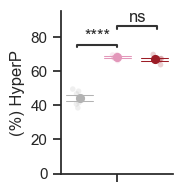

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.078e-02 stat=-3.125e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.215e-01 stat=1.304e+00


<Figure size 640x480 with 0 Axes>

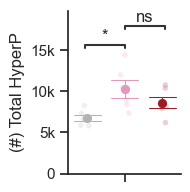

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=9.031e-01 stat=1.249e-01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.347e-01 stat=1.264e+00


<Figure size 640x480 with 0 Axes>

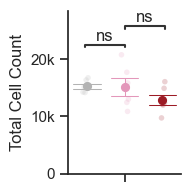

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=3.970e-08 stat=-1.480e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.514e-01 stat=4.658e-01


<Figure size 640x480 with 0 Axes>

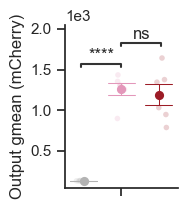

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.440e-09 stat=-1.974e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.952e-01 stat=1.388e+00


<Figure size 640x480 with 0 Axes>

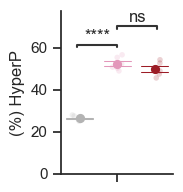

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=8.156e-05 stat=-6.368e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=3.402e-02 stat=2.454e+00


<Figure size 640x480 with 0 Axes>

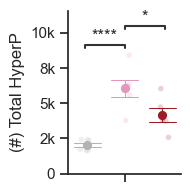

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=5.843e-03 stat=-3.488e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.235e-02 stat=2.699e+00


<Figure size 640x480 with 0 Axes>

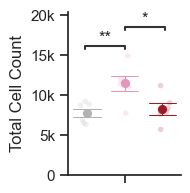

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.288e-09 stat=-1.987e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.794e-04 stat=-5.773e+00


<Figure size 640x480 with 0 Axes>

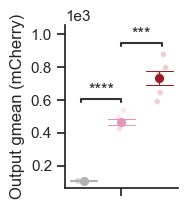

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=4.403e-09 stat=-1.858e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.277e-01 stat=-1.285e+00


<Figure size 640x480 with 0 Axes>

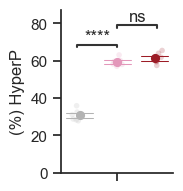

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.239e-06 stat=-9.632e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=5.382e-01 stat=-6.375e-01


<Figure size 640x480 with 0 Axes>

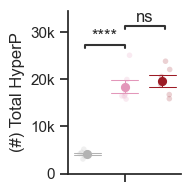

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=6.340e-06 stat=-8.581e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.869e-01 stat=-4.150e-01


<Figure size 640x480 with 0 Axes>

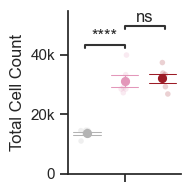

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.476e-07 stat=-1.290e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=3.198e-01 stat=1.047e+00


<Figure size 640x480 with 0 Axes>

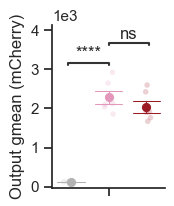

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.061e-08 stat=-1.697e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.417e-04 stat=-5.557e+00


<Figure size 640x480 with 0 Axes>

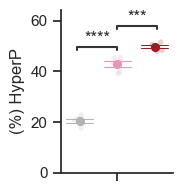

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.263e-05 stat=-7.936e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=9.487e-03 stat=-3.200e+00


<Figure size 640x480 with 0 Axes>

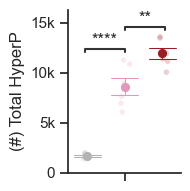

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=3.367e-05 stat=-7.082e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=5.440e-02 stat=-2.178e+00


<Figure size 640x480 with 0 Axes>

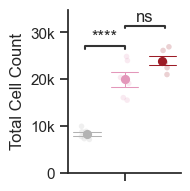

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.070e-07 stat=-1.245e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.583e-06 stat=-1.000e+01


<Figure size 640x480 with 0 Axes>

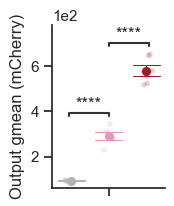

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=9.388e-10 stat=-2.176e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.371e-01 stat=4.865e-01


<Figure size 640x480 with 0 Axes>

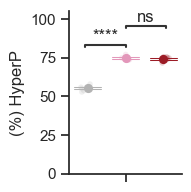

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=3.253e-05 stat=-7.111e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=7.446e-01 stat=-3.349e-01


<Figure size 640x480 with 0 Axes>

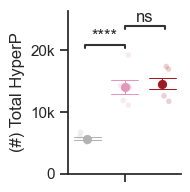

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.608e-04 stat=-5.503e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=7.042e-01 stat=-3.907e-01


<Figure size 640x480 with 0 Axes>

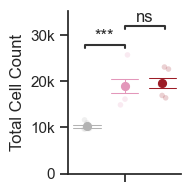

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.636e-08 stat=-1.545e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=4.677e-03 stat=3.622e+00


<Figure size 640x480 with 0 Axes>

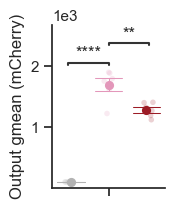

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.564e-06 stat=-9.490e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.789e-03 stat=-3.937e+00


<Figure size 640x480 with 0 Axes>

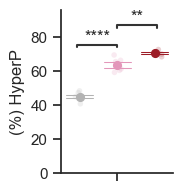

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.226e-04 stat=-5.616e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=2.856e-02 stat=-2.556e+00


<Figure size 640x480 with 0 Axes>

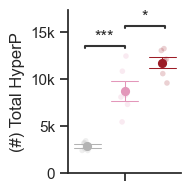

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=3.648e-04 stat=-5.266e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=8.086e-02 stat=-1.942e+00


<Figure size 640x480 with 0 Axes>

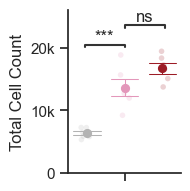

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=2.380e-06 stat=-9.568e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.076e-05 stat=-8.083e+00


<Figure size 640x480 with 0 Axes>

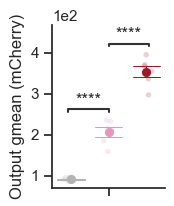

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.340e-06 stat=-1.019e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.406e-01 stat=4.813e-01


<Figure size 640x480 with 0 Axes>

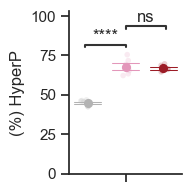

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.297e-05 stat=-7.912e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.231e-01 stat=-1.684e+00


<Figure size 640x480 with 0 Axes>

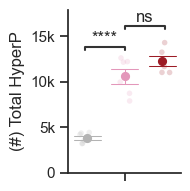

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=8.711e-05 stat=-6.317e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=5.945e-02 stat=-2.126e+00


<Figure size 640x480 with 0 Axes>

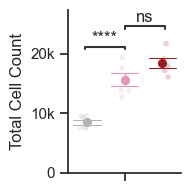

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=6.558e-06 stat=-8.548e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.198e-01 stat=5.119e-01


<Figure size 640x480 with 0 Axes>

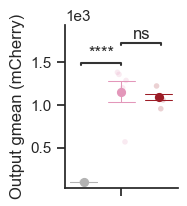

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.905e-07 stat=-1.256e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.406e-05 stat=-7.839e+00


<Figure size 640x480 with 0 Axes>

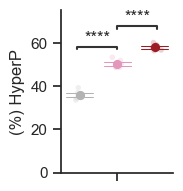

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=7.259e-09 stat=-1.765e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=6.386e-05 stat=-6.561e+00


<Figure size 640x480 with 0 Axes>

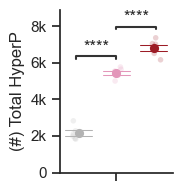

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=9.251e-07 stat=-1.061e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=4.488e-02 stat=-2.292e+00


<Figure size 640x480 with 0 Axes>

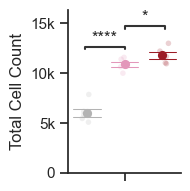

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=3.212e-05 stat=-7.121e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=3.869e-03 stat=-3.736e+00


<Figure size 640x480 with 0 Axes>

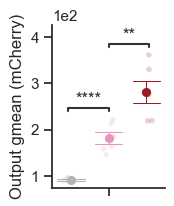

<Figure size 640x480 with 0 Axes>

In [ ]:
# modRNA results, mCh-RAS

order = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']#,'mCh-RAS(YBTATA, 610bp)']
#hue_order = ['No ZF, NoCre','PGK-ZF37-BFP, NoCre','PGK-ZF37-BFP, modeeBxb1','PGK-ZF37-BFP, modPuroCre']
hue_order = ['No ZF, NoCre','PGK-ZF37-BFP, modeeBxb1','PGK-ZF37-BFP, modPuroCre']
palette = { 'No ZF, NoCre':'#b3b3b3', 'PGK-ZF37-BFP, modeeBxb1':'#E397BA', 'PGK-ZF37-BFP, modPuroCre':'#9C1C26'}

pairs = [(('mCh-RAS(YBcon)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBcon)','PGK-ZF37-BFP, modPuroCre')),
          (('mCh-RAS(YBTATA, 380bp)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBTATA, 380bp)','PGK-ZF37-BFP, modPuroCre')),
          (('mCh-RAS(YBTATA, 610bp)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBTATA, 610bp)','PGK-ZF37-BFP, modPuroCre'))]

for rep in ['2025.04.14', '2025.04.28', '2025.05.12_A', '2025.05.12_B']:
    for reporter in order:
        pairs = [((reporter,'No ZF, NoCre'),(reporter,'PGK-ZF37-BFP, modeeBxb1')),
                 ((reporter,'PGK-ZF37-BFP, modeeBxb1'),(reporter,'PGK-ZF37-BFP, modPuroCre'))]
        slice = summary_df[(summary_df['reporter']==reporter) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'] == 'none') & (summary_df.rep == rep)]
        for y in bar2plot:
            savetitle = '5dpi_modRNA_' + savedict[reporter] + '_' + savedict[y] + '_Rep' + rep
            # custom_barplot('reporter',y,slice,savetitle,
            #                 plottitle=plottitle,
            #                 hue = 'ZF, cre',
            #                 hue_order=hue_order,
            #                 height=2.5,
            #                 width=2,
            #                 order=[reporter],
            #                 palette=palette,reps='rep',xlabel_rot=0,
            #                 pairs=pairs,subfolder='5dpi_by_rep')
            SK_dotplot(x='reporter',y=y,hue='ZF, cre',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_by_rep',
                   legend=False,xticklabels=False,y_ax_k=True,scientific=False,ylim=[0,None])

        for y in dot2plot:
            savetitle = '5dpi_modRNA_' + savedict[reporter] + '_' + savedict[y] + '_Rep' + rep
            # custom_catplot('reporter',y,slice,savetitle,
            #                 plottitle=plottitle,
            #                 hue = 'ZF, cre',
            #                 hue_order=hue_order,
            #                 height=2.5,
            #                 width=2,
            #                 order=[reporter],
            #                 palette=palette,log=False,errorbar=False,reps='rep',sci=True,xlabel_rot=0,
            #                 pairs=pairs,size=8,subfolder='5dpi_by_rep')
            SK_dotplot(x='reporter',y=y,hue='ZF, cre',data=slice,
                    pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                    savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_by_rep',
                   legend=False,xticklabels=False,ylabel='Output gmean (mCherry)')


## GibCre Results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.052e-08 stat=-7.181e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.122e-01 stat=1.268e+00


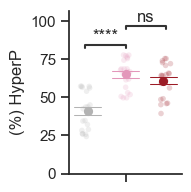

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=8.513e-08 stat=-6.530e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=3.394e-01 stat=9.669e-01


<Figure size 640x480 with 0 Axes>

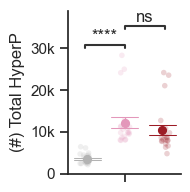

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=7.037e-05 stat=-4.434e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=5.870e-01 stat=5.477e-01


<Figure size 640x480 with 0 Axes>

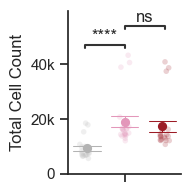

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=4.339e-25 stat=-2.360e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.854e-01 stat=1.348e+00


<Figure size 640x480 with 0 Axes>

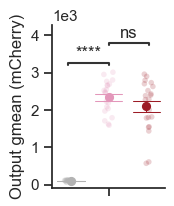

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=3.601e-06 stat=-5.393e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=8.117e-01 stat=-2.399e-01


<Figure size 640x480 with 0 Axes>

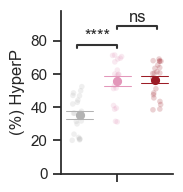

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=7.100e-06 stat=-5.179e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.888e-01 stat=-6.988e-01


<Figure size 640x480 with 0 Axes>

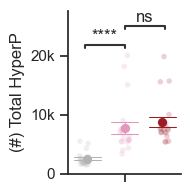

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.283e-03 stat=-3.265e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=5.969e-01 stat=-5.333e-01


<Figure size 640x480 with 0 Axes>

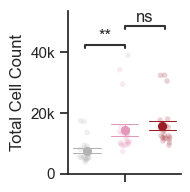

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.346e-20 stat=-1.784e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.400e-13 stat=-1.105e+01


<Figure size 640x480 with 0 Axes>

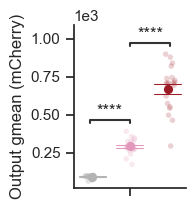

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=6.651e-05 stat=-4.904e+00
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=3.568e-01 stat=-9.412e-01


<Figure size 640x480 with 0 Axes>

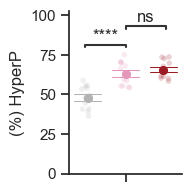

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.862e-09 stat=-9.764e+00
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=3.646e-01 stat=-9.258e-01


<Figure size 640x480 with 0 Axes>

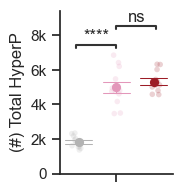

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.471e-11 stat=-1.263e+01
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=5.158e-01 stat=-6.605e-01


<Figure size 640x480 with 0 Axes>

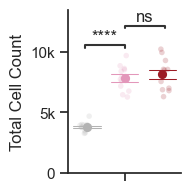

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 610bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=6.632e-11 stat=-1.168e+01
mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 610bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.237e-05 stat=-5.604e+00


<Figure size 640x480 with 0 Axes>

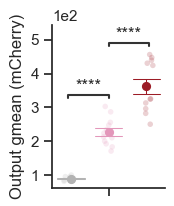

<Figure size 640x480 with 0 Axes>

In [ ]:
# GibCre results, mCh-RAS

order = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)','mCh-RAS(YBTATA, 610bp)']
#hue_order = ['No ZF, NoCre, vehicle','No ZF, GibCre, vehicle','PGK-ZF37-BFP, GibCre, vehicle','PGK-ZF37-BFP, GibCre, +Gib',]
hue_order = ['No ZF, GibCre, vehicle','PGK-ZF37-BFP, GibCre, vehicle','PGK-ZF37-BFP, GibCre, +Gib',]
palette = { 'No ZF, GibCre, vehicle':'#b3b3b3', 'PGK-ZF37-BFP, GibCre, vehicle':'#E397BA', 'PGK-ZF37-BFP, GibCre, +Gib':'#9C1C26'}

pairs = [(('mCh-RAS(YBcon)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBcon)','PGK-ZF37-BFP, GibCre, +Gib')),
          (('mCh-RAS(YBTATA, 380bp)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBTATA, 380bp)','PGK-ZF37-BFP, GibCre, +Gib')),
          (('mCh-RAS(YBTATA, 610bp)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBTATA, 610bp)','PGK-ZF37-BFP, GibCre, +Gib'))]

for reporter in order:
    pairs = [((reporter, 'No ZF, GibCre, vehicle'),(reporter,'PGK-ZF37-BFP, GibCre, vehicle')),
             ((reporter, 'PGK-ZF37-BFP, GibCre, vehicle'),(reporter,'PGK-ZF37-BFP, GibCre, +Gib'))]
    for y in bar2plot:
        slice = summary_df[(summary_df['reporter']==reporter) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'].isin(['vehicle','+Gib']))]
        savetitle = '5dpi_GibCre_' + savedict[reporter] + '_' + savedict[y]
        # custom_barplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre, gib',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,reps='rep',xlabel_rot=0,
        #                 pairs=pairs,subfolder='5dpi_all_reps')
        SK_dotplot(x='reporter',y=y,hue='ZF, cre, gib',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps',
                   legend=False,xticklabels=False,y_ax_k=True,scientific=False,ylim=[0,None])

    for y in dot2plot:
        slice = summary_df[(summary_df['reporter']==reporter) & (summary_df.ZF.isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'].isin(['vehicle','+Gib']))]
        savetitle = '5dpi_GibCre_' + savedict[reporter] + '_' + savedict[y]
        # custom_catplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre, gib',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,log=False,errorbar=False,reps='rep',sci=True,xlabel_rot=0,
        #                 pairs=pairs,size=8)
        SK_dotplot(x='reporter',y=y,hue='ZF, cre, gib',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps',
                   legend=False,xticklabels=False,ylabel='Output gmean (mCherry)')



## GibCre results separated by rep

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=3.688e-05 stat=-2.000e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=8.211e-02 stat=2.309e+00


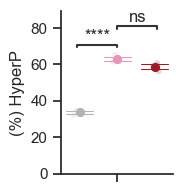

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.222e-04 stat=-1.477e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.443e-01 stat=1.812e+00


<Figure size 640x480 with 0 Axes>

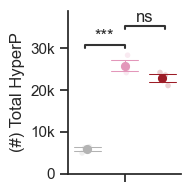

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.192e-04 stat=-1.487e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.964e-01 stat=1.200e+00


<Figure size 640x480 with 0 Axes>

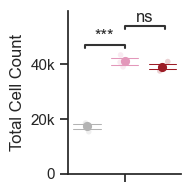

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.357e-05 stat=-2.572e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=7.665e-02 stat=2.372e+00


<Figure size 640x480 with 0 Axes>

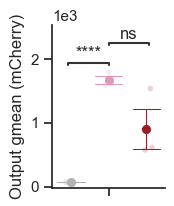

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.448e-05 stat=-2.530e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=6.934e-01 stat=-4.239e-01


<Figure size 640x480 with 0 Axes>

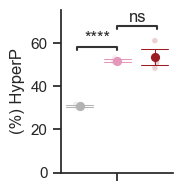

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.030e-03 stat=-8.543e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=7.376e-01 stat=3.593e-01


<Figure size 640x480 with 0 Axes>

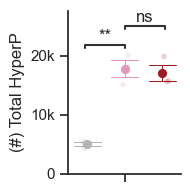

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=3.831e-03 stat=-6.022e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.356e-01 stat=8.655e-01


<Figure size 640x480 with 0 Axes>

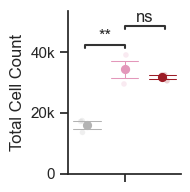

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=9.598e-07 stat=-4.997e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.927e-03 stat=-7.244e+00


<Figure size 640x480 with 0 Axes>

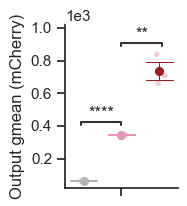

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.595e-09 stat=-1.961e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=6.091e-03 stat=3.463e+00


<Figure size 640x480 with 0 Axes>

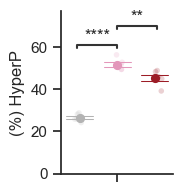

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=8.541e-07 stat=-1.070e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.315e-02 stat=2.679e+00


<Figure size 640x480 with 0 Axes>

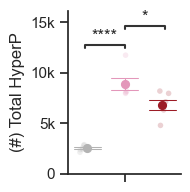

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=3.322e-06 stat=-9.222e+00
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=5.660e-02 stat=2.155e+00


<Figure size 640x480 with 0 Axes>

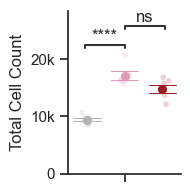

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=9.129e-10 stat=-2.182e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.221e-02 stat=2.703e+00


<Figure size 640x480 with 0 Axes>

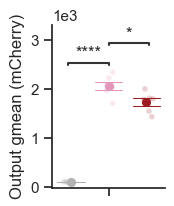

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=3.379e-05 stat=-7.585e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=3.500e-02 stat=-2.480e+00


<Figure size 640x480 with 0 Axes>

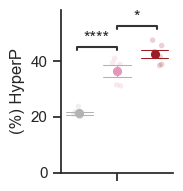

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.151e-04 stat=-6.473e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.433e-02 stat=-2.702e+00


<Figure size 640x480 with 0 Axes>

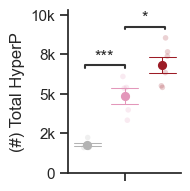

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.765e-04 stat=-6.113e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.717e-02 stat=-2.634e+00


<Figure size 640x480 with 0 Axes>

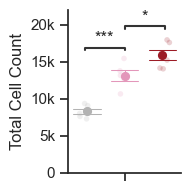

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.960e-05 stat=-8.123e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.375e-06 stat=-1.121e+01


<Figure size 640x480 with 0 Axes>

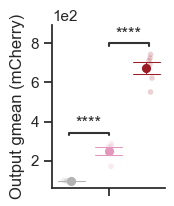

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.367e-10 stat=-2.647e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=8.286e-03 stat=3.280e+00


<Figure size 640x480 with 0 Axes>

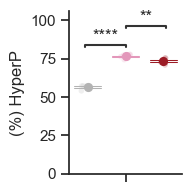

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.059e-08 stat=-1.585e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.090e-01 stat=1.343e+00


<Figure size 640x480 with 0 Axes>

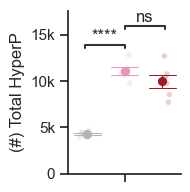

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.899e-07 stat=-1.256e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=3.837e-01 stat=9.111e-01


<Figure size 640x480 with 0 Axes>

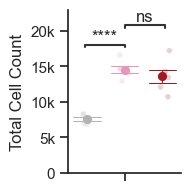

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=7.658e-12 stat=-3.541e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=5.210e-02 stat=2.204e+00


<Figure size 640x480 with 0 Axes>

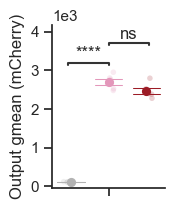

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.333e-08 stat=-1.658e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.965e-02 stat=2.774e+00


<Figure size 640x480 with 0 Axes>

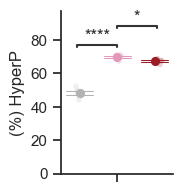

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.744e-07 stat=-1.208e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.286e-01 stat=-8.251e-01


<Figure size 640x480 with 0 Axes>

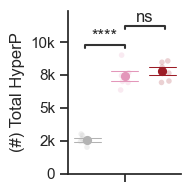

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=9.679e-06 stat=-8.181e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.298e-01 stat=-1.279e+00


<Figure size 640x480 with 0 Axes>

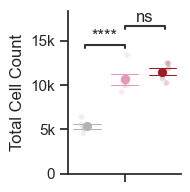

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=8.399e-10 stat=-2.201e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=3.031e-03 stat=-3.886e+00


<Figure size 640x480 with 0 Axes>

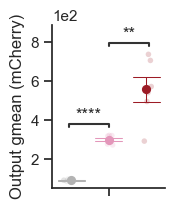

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.386e-11 stat=-3.158e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.922e-05 stat=6.770e+00


<Figure size 640x480 with 0 Axes>

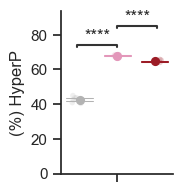

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.551e-08 stat=-1.632e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.598e-02 stat=2.895e+00


<Figure size 640x480 with 0 Axes>

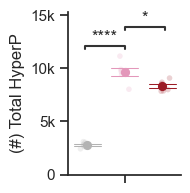

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.848e-07 stat=-1.203e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=6.500e-02 stat=2.073e+00


<Figure size 640x480 with 0 Axes>

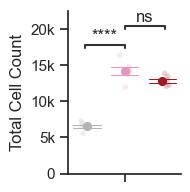

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=7.737e-10 stat=-2.219e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.842e-01 stat=-7.264e-01


<Figure size 640x480 with 0 Axes>

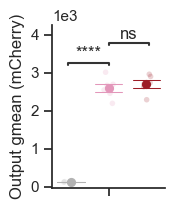

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=5.049e-08 stat=-1.444e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=2.393e-01 stat=-1.251e+00


<Figure size 640x480 with 0 Axes>

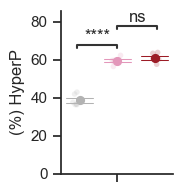

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=4.463e-06 stat=-8.925e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.690e-02 stat=-2.266e+00


<Figure size 640x480 with 0 Axes>

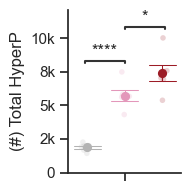

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=3.670e-05 stat=-7.010e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.082e-02 stat=-2.347e+00


<Figure size 640x480 with 0 Axes>

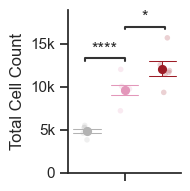

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.205e-05 stat=-7.979e+00
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=6.448e-05 stat=-6.553e+00


<Figure size 640x480 with 0 Axes>

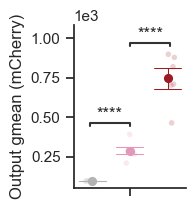

<Figure size 640x480 with 0 Axes>

In [ ]:
# GibCre results, mCh-RAS

order = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']#,'mCh-RAS(YBTATA, 610bp)']
#hue_order = ['No ZF, NoCre, vehicle','No ZF, GibCre, vehicle','PGK-ZF37-BFP, GibCre, vehicle','PGK-ZF37-BFP, GibCre, +Gib',]
hue_order = ['No ZF, GibCre, vehicle','PGK-ZF37-BFP, GibCre, vehicle','PGK-ZF37-BFP, GibCre, +Gib',]
palette = { 'No ZF, GibCre, vehicle':'#b3b3b3', 'PGK-ZF37-BFP, GibCre, vehicle':'#E397BA', 'PGK-ZF37-BFP, GibCre, +Gib':'#9C1C26'}

pairs = [(('mCh-RAS(YBcon)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBcon)','PGK-ZF37-BFP, GibCre, +Gib')),
          (('mCh-RAS(YBTATA, 380bp)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBTATA, 380bp)','PGK-ZF37-BFP, GibCre, +Gib')),
          (('mCh-RAS(YBTATA, 610bp)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBTATA, 610bp)','PGK-ZF37-BFP, GibCre, +Gib'))]

for rep in ['2025.03.24', '2025.04.28', '2025.05.12_A', '2025.05.12_B']:
    for reporter in order:
        pairs = [((reporter, 'No ZF, GibCre, vehicle'),(reporter,'PGK-ZF37-BFP, GibCre, vehicle')),
                 ((reporter, 'PGK-ZF37-BFP, GibCre, vehicle'),(reporter,'PGK-ZF37-BFP, GibCre, +Gib'))]
        slice = summary_df[(summary_df['reporter']==reporter) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'].isin(['vehicle','+Gib'])) & (summary_df.rep == rep)]
        for y in bar2plot:
            savetitle = '5dpi_GibCre_' + savedict[reporter] + '_' + savedict[y] + '_Rep' + rep
            plottitle = '5 dpi, Rep ' + rep
            # custom_barplot('reporter',y,slice,savetitle,
            #                 plottitle=plottitle,
            #                 hue = 'ZF, cre, gib',
            #                 hue_order=hue_order,
            #                 height=2.5,
            #                 width=2,
            #                 order=[reporter],
            #                 palette=palette,reps='rep',xlabel_rot=0,
            #                 pairs=pairs,subfolder='5dpi_by_rep')
            SK_dotplot(x='reporter',y=y,hue='ZF, cre, gib',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_by_rep',
                   legend=False,xticklabels=False,y_ax_k=True,scientific=False,ylim=[0,None])

        for y in dot2plot:
            savetitle = '5dpi_GibCre_' + savedict[reporter] + '_' + savedict[y] + '_Rep' + rep
            # custom_catplot('reporter',y,slice,savetitle,
            #                 plottitle=plottitle,
            #                 hue = 'ZF, cre, gib',
            #                 hue_order=hue_order,
            #                 height=2.5,
            #                 width=2,
            #                 order=[reporter],
            #                 palette=palette,log=False,errorbar=False,reps='rep',sci=True,xlabel_rot=0,
            #                 pairs=pairs,size=8)
            SK_dotplot(x='reporter',y=y,hue='ZF, cre, gib',data=slice,
                    pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                    savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_by_rep',
                   legend=False,xticklabels=False,ylabel='Output gmean (mCherry)')



# Calculate fold changes

In [23]:

display(summary_df.columns)

Index(['rep', 'reprogramming', 'reporter', 'ZF', 'cre', 'gib', 'well',
       'condition_all', 'cre, gib', 'ZF, cre', 'ZF, cre, gib',
       'reporter, ZF, cre, gib', 'reporter, ZF, cre', '(%) HyperP',
       '(#) Total HyperP', 'Total Cell Count', 'mCherry MFI',
       '(%) iMN\nof all cells', 'iMN Yield', '(%) iMN yield\nper MEF plated'],
      dtype='object')

In [24]:
reporters = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)','mCh-RAS(YBTATA, 610bp)']
mod_slice = summary_df[(summary_df['reporter'].isin(reporters)) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'] == 'none')
                       & (summary_df.rep.isin(mod_reps2plot))]
gib_slice = summary_df[(summary_df['reporter'].isin(reporters)) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'].isin(['vehicle','+Gib']))
                       & (summary_df.rep.isin(gib_reps2plot))]

# drop all condition columns but 'reporter' and 'ZF, cre' in order to calculate mean of each 'reporter' and 'ZF, cre' conditions across wells and reps
mod_slice = mod_slice.drop(columns=['rep', 'reprogramming', 'ZF', 'cre', 'gib', 'well',
                                    'condition_all', 'cre, gib', 'ZF, cre, gib',
                                    'reporter, ZF, cre, gib', 'reporter, ZF, cre'])

# drop all condition columns but 'reporter' and 'ZF, cre, gib' in order to calculate mean of each 'reporter' and 'ZF, cre, gib' conditions across wells and reps
gib_slice = gib_slice.drop(columns=['rep', 'reprogramming', 'ZF', 'cre', 'gib', 'well',
                                    'condition_all', 'cre, gib', 'ZF, cre',
                                    'reporter, ZF, cre, gib', 'reporter, ZF, cre'])

# Find the mean and standard error of the mean (SEM) for all technical and biological replicates in a given condition:
mod_means = mod_slice.groupby(['reporter','ZF, cre']).mean()
mod_means.reset_index(drop=False,inplace=True) # Remove index

gib_means = gib_slice.groupby(['reporter','ZF, cre, gib']).mean()
gib_means.reset_index(drop=False,inplace=True) # Remove index

means = mod_means
for reporter in reporters:
    mod_norm_row = mod_means[(mod_means.reporter == reporter) & (mod_means['ZF, cre'] == 'PGK-ZF37-BFP, modeeBxb1')]
    gib_norm_row = gib_means[(gib_means.reporter == reporter) & (gib_means['ZF, cre, gib'] == 'PGK-ZF37-BFP, GibCre, vehicle')]
    for i in ['(#) Total HyperP','(%) HyperP','mCherry MFI']:
        mod_means.loc[(mod_means.reporter == reporter),i+' Fold Change'] = mod_means.loc[
                        (mod_means.reporter == reporter),i] / mod_norm_row[i].values[0]
        gib_means.loc[(gib_means.reporter == reporter),i+' Fold Change'] = gib_means.loc[
                        (gib_means.reporter == reporter),i] / gib_norm_row[i].values[0]
    

mod_means.to_csv(outputdir/'5dpi_modRNA_foldX_all_reps.csv', index=False)
gib_means.to_csv(outputdir/'5dpi_GibCre_foldX_all_reps.csv', index=False)


In [25]:
reporters = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']#,'mCh-RAS(YBTATA, 610bp)']
mod_slice = summary_df[(summary_df['reporter'].isin(reporters)) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'] == 'none')]
gib_slice = summary_df[(summary_df['reporter'].isin(reporters)) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'].isin(['vehicle','+Gib']))]

# drop all condition columns but 'reporter' and 'ZF, cre' in order to calculate mean of each 'reporter' and 'ZF, cre' conditions across wells and reps
mod_slice = mod_slice.drop(columns=['reprogramming', 'ZF', 'cre', 'gib', 'well',
                                    'condition_all', 'cre, gib', 'ZF, cre, gib',
                                    'reporter, ZF, cre, gib', 'reporter, ZF, cre'])

# drop all condition columns but 'reporter' and 'ZF, cre, gib' in order to calculate mean of each 'reporter' and 'ZF, cre' conditions across wells and reps
gib_slice = gib_slice.drop(columns=['reprogramming', 'ZF', 'cre', 'gib', 'well',
                                    'condition_all', 'cre, gib', 'ZF, cre',
                                    'reporter, ZF, cre, gib', 'reporter, ZF, cre'])

# Find the mean and standard error of the mean (SEM) for all technical and biological replicates in a given condition:
mod_means = mod_slice.groupby(['rep','reporter','ZF, cre']).mean()
mod_means.reset_index(drop=False,inplace=True) # Remove index

gib_means = gib_slice.groupby(['rep','reporter','ZF, cre, gib']).mean()
gib_means.reset_index(drop=False,inplace=True) # Remove index

for reporter in reporters:
    for rep in ['2025.04.14', '2025.04.28', '2025.05.12_A', '2025.05.12_B']:
        mod_norm_row = mod_means[(mod_means.reporter == reporter) & (mod_means['ZF, cre'] == 'PGK-ZF37-BFP, modeeBxb1') & (mod_means.rep==rep)]
        for i in ['(#) Total HyperP','(%) HyperP','mCherry MFI']:
            mod_means.loc[(mod_means.reporter == reporter) & (mod_means.rep==rep),i+' Fold Change'] = mod_means.loc[
                          (mod_means.reporter == reporter) & (mod_means.rep==rep),i] / mod_norm_row[i].values[0]
            
    for rep in ['2025.03.24', '2025.04.28', '2025.05.12_A', '2025.05.12_B']:
        gib_norm_row = gib_means[(gib_means.reporter == reporter) & (gib_means['ZF, cre, gib'] == 'PGK-ZF37-BFP, GibCre, vehicle') & (gib_means.rep==rep)]
        for i in ['(#) Total HyperP','(%) HyperP','mCherry MFI']:
            gib_means.loc[(gib_means.reporter == reporter) & (gib_means.rep==rep),i+' Fold Change'] = gib_means.loc[
                            (gib_means.reporter == reporter) & (gib_means.rep==rep),i] / gib_norm_row[i].values[0]
    

mod_means.to_csv(outputdir/'5dpi_modRNA_foldX_by_rep.csv', index=False)
gib_means.to_csv(outputdir/'5dpi_GibCre_foldX_by_rep.csv', index=False)

# Summary stats - normalize to mean of "low" for each rep

In [26]:
reporters = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']#,'mCh-RAS(YBTATA, 610bp)']
mod_slice = summary_df[(summary_df['reporter'].isin(reporters)) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'] == 'none')]
gib_slice = summary_df[(summary_df['reporter'].isin(reporters)) & (summary_df['ZF'].isin(['No ZF','PGK-ZF37-BFP'])) & (summary_df['gib'].isin(['vehicle','+Gib']))]

# drop all condition columns but 'reporter' and 'ZF, cre' in order to calculate mean of each 'reporter' and 'ZF, cre' conditions across wells and reps
mod_slice = mod_slice.drop(columns=['reprogramming', 'ZF', 'cre', 'gib', 'well',
                                    'condition_all', 'cre, gib', 'ZF, cre, gib',
                                    'reporter, ZF, cre, gib', 'reporter, ZF, cre'])

# drop all condition columns but 'reporter' and 'ZF, cre, gib' in order to calculate mean of each 'reporter' and 'ZF, cre' conditions across wells and reps
gib_slice = gib_slice.drop(columns=['reprogramming', 'ZF', 'cre', 'gib', 'well',
                                    'condition_all', 'cre, gib', 'ZF, cre',
                                    'reporter, ZF, cre, gib', 'reporter, ZF, cre'])

# Find the mean and standard error of the mean (SEM) for all technical and biological replicates in a given condition:
mod_means = mod_slice.groupby(['rep','reporter','ZF, cre']).mean()
mod_means.reset_index(drop=False,inplace=True) # Remove index

gib_means = gib_slice.groupby(['rep','reporter','ZF, cre, gib']).mean()
gib_means.reset_index(drop=False,inplace=True) # Remove index

for reporter in reporters:
    for rep in ['2025.04.14', '2025.04.28', '2025.05.12_A', '2025.05.12_B']:
        mod_norm_row = mod_means[(mod_means.reporter == reporter) & (mod_means['ZF, cre'] == 'PGK-ZF37-BFP, modeeBxb1') & (mod_means.rep==rep)]
        for i in ['(#) Total HyperP','(%) HyperP','mCherry MFI']:
            mod_slice.loc[(mod_slice.reporter == reporter) & (mod_slice.rep==rep),i+'\nNormalized'] = mod_slice.loc[
                          (mod_slice.reporter == reporter) & (mod_slice.rep==rep),i] / mod_norm_row[i].values[0]
            
    for rep in ['2025.03.24', '2025.04.28', '2025.05.12_A', '2025.05.12_B']:
        gib_norm_row = gib_means[(gib_means.reporter == reporter) & (gib_means['ZF, cre, gib'] == 'PGK-ZF37-BFP, GibCre, vehicle') & (gib_means.rep==rep)]
        for i in ['(#) Total HyperP','(%) HyperP','mCherry MFI']:
            gib_slice.loc[(gib_slice.reporter == reporter) & (gib_slice.rep==rep),i+'\nNormalized'] = gib_slice.loc[
                            (gib_slice.reporter == reporter) & (gib_slice.rep==rep),i] / gib_norm_row[i].values[0]
    


In [32]:
mod_slice.to_csv('Fig6_ZF-DIAL_MEFs_5dpi_modRNA_normalized.csv',index=False)
gib_slice.to_csv('Fig6_ZF-DIAL_MEFs_5dpi_GibCre_normalized.csv',index=False)

In [27]:
bar2plot_norm = ['(#) Total HyperP\nNormalized','(%) HyperP\nNormalized']
dot2plot_norm = ['mCherry MFI\nNormalized']
#mod_reps2plot = ['2025.04.14', '2025.04.28', '2025.05.12_A', '2025.05.12_B']
mod_reps2plot = ['2025.04.28', '2025.05.12_A', '2025.05.12_B']

gib_reps2plot = ['2025.03.24', '2025.04.28', '2025.05.12_A', '2025.05.12_B']


## Normalized modRNA results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.169e-15 stat=-1.398e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.349e-01 stat=-1.532e+00


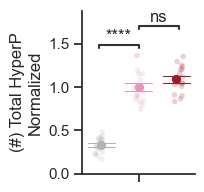

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.611e-15 stat=-1.383e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=7.906e-01 stat=-2.677e-01


<Figure size 640x480 with 0 Axes>

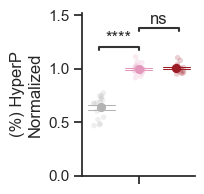

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, NoCre v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=6.859e-21 stat=-2.076e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.893e-02 stat=2.465e+00


<Figure size 640x480 with 0 Axes>

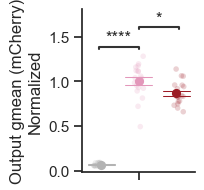

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=1.365e-14 stat=-1.284e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=4.174e-06 stat=-5.473e+00


<Figure size 640x480 with 0 Axes>

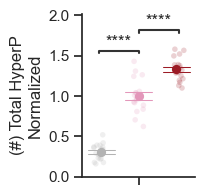

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=8.258e-14 stat=-1.204e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=5.880e-11 stat=-9.378e+00


<Figure size 640x480 with 0 Axes>

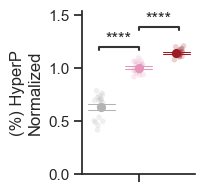

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, NoCre v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1: t-test independent samples, P_val=9.697e-17 stat=-1.522e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modeeBxb1 v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, modPuroCre: t-test independent samples, P_val=1.667e-11 stat=-9.861e+00


<Figure size 640x480 with 0 Axes>

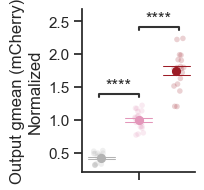

<Figure size 640x480 with 0 Axes>

In [29]:
# modRNA results, mCh-RAS

order = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']
#hue_order = ['No ZF, NoCre','PGK-ZF37-BFP, NoCre','PGK-ZF37-BFP, modeeBxb1','PGK-ZF37-BFP, modPuroCre']
hue_order = ['No ZF, NoCre','PGK-ZF37-BFP, modeeBxb1','PGK-ZF37-BFP, modPuroCre']
palette = { 'No ZF, NoCre':'#b3b3b3', 'PGK-ZF37-BFP, modeeBxb1':'#E397BA', 'PGK-ZF37-BFP, modPuroCre':'#9C1C26'}

pairs = [(('mCh-RAS(YBcon)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBcon)','PGK-ZF37-BFP, modPuroCre')),
          (('mCh-RAS(YBTATA, 380bp)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBTATA, 380bp)','PGK-ZF37-BFP, modPuroCre')),
          (('mCh-RAS(YBTATA, 610bp)', 'PGK-ZF37-BFP, modeeBxb1'),('mCh-RAS(YBTATA, 610bp)','PGK-ZF37-BFP, modPuroCre'))]

for reporter in order:
    pairs = [((reporter,'No ZF, NoCre'),(reporter,'PGK-ZF37-BFP, modeeBxb1')),
             ((reporter,'PGK-ZF37-BFP, modeeBxb1'),(reporter,'PGK-ZF37-BFP, modPuroCre')),]
    slice = mod_slice[(mod_slice['reporter']==reporter) & (mod_slice.rep.isin(mod_reps2plot))]
    for y in bar2plot_norm:
        savetitle = '5dpi_modRNA_' + savedict[reporter] + '_' + savedict[y]
        # custom_barplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,reps='rep',xlabel_rot=0,
        #                 pairs=pairs,subfolder='5dpi_all_reps_normalized')
        SK_dotplot(x='reporter',y=y,hue='ZF, cre',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps_normalized',
                   legend=False,xticklabels=False,y_ax_k=True,scientific=False,ylim=[0,None])

    for y in dot2plot_norm:
        savetitle = '5dpi_modRNA_' + savedict[reporter] + '_' + savedict[y]
        # custom_catplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,log=False,errorbar=False,reps='rep',sci=True,xlabel_rot=0,
        #                 pairs=pairs,size=8,subfolder='5dpi_all_reps')
        SK_dotplot(x='reporter',y=y,hue='ZF, cre',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps_normalized',
                   legend=False,xticklabels=False,ylabel='Output gmean (mCherry)\nNormalized')


## Normalized GibCre Results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.818e-26 stat=-2.538e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.588e-04 stat=4.170e+00


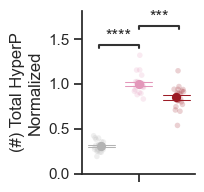

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.804e-20 stat=-1.764e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.638e-06 stat=5.293e+00


<Figure size 640x480 with 0 Axes>

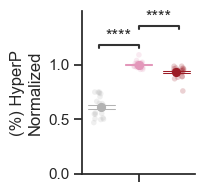

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBcon)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.896e-38 stat=-5.174e+01
mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBcon)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=1.475e-02 stat=2.549e+00


<Figure size 640x480 with 0 Axes>

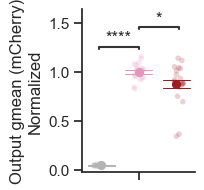

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=2.438e-20 stat=-1.782e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=4.025e-03 stat=-3.057e+00


<Figure size 640x480 with 0 Axes>

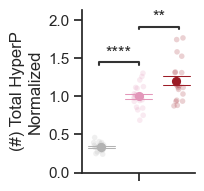

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=1.308e-21 stat=-1.937e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=6.670e-02 stat=-1.886e+00


<Figure size 640x480 with 0 Axes>

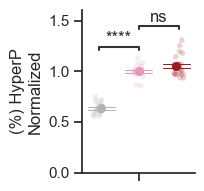

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mCh-RAS(YBTATA, 380bp)_No ZF, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle: t-test independent samples, P_val=5.590e-22 stat=-1.984e+01
mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, vehicle v.s. mCh-RAS(YBTATA, 380bp)_PGK-ZF37-BFP, GibCre, +Gib: t-test independent samples, P_val=8.248e-13 stat=-1.040e+01


<Figure size 640x480 with 0 Axes>

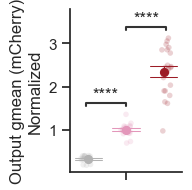

<Figure size 640x480 with 0 Axes>

In [30]:
# GibCre results, mCh-RAS

order = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']
#hue_order = ['No ZF, NoCre, vehicle','No ZF, GibCre, vehicle','PGK-ZF37-BFP, GibCre, vehicle','PGK-ZF37-BFP, GibCre, +Gib',]
hue_order = ['No ZF, GibCre, vehicle','PGK-ZF37-BFP, GibCre, vehicle','PGK-ZF37-BFP, GibCre, +Gib',]
palette = { 'No ZF, GibCre, vehicle':'#b3b3b3', 'PGK-ZF37-BFP, GibCre, vehicle':'#E397BA', 'PGK-ZF37-BFP, GibCre, +Gib':'#9C1C26'}

pairs = [(('mCh-RAS(YBcon)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBcon)','PGK-ZF37-BFP, GibCre, +Gib')),
          (('mCh-RAS(YBTATA, 380bp)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBTATA, 380bp)','PGK-ZF37-BFP, GibCre, +Gib')),
          (('mCh-RAS(YBTATA, 610bp)', 'PGK-ZF37-BFP, GibCre, vehicle'),('mCh-RAS(YBTATA, 610bp)','PGK-ZF37-BFP, GibCre, +Gib'))]

for reporter in order:
    pairs = [((reporter, 'No ZF, GibCre, vehicle'),(reporter,'PGK-ZF37-BFP, GibCre, vehicle')),
             ((reporter, 'PGK-ZF37-BFP, GibCre, vehicle'),(reporter,'PGK-ZF37-BFP, GibCre, +Gib'))]
    slice = gib_slice[(gib_slice['reporter']==reporter) & (gib_slice.rep.isin(gib_reps2plot))]
    for y in bar2plot_norm:
        savetitle = '5dpi_GibCre_' + savedict[reporter] + '_' + savedict[y]
        plottitle = '5 dpi'
        # custom_barplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre, gib',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,reps='rep',xlabel_rot=0,
        #                 pairs=pairs,subfolder='5dpi_all_reps_normalized')
        SK_dotplot(x='reporter',y=y,hue='ZF, cre, gib',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps_normalized',
                   legend=False,xticklabels=False,y_ax_k=True,scientific=False,ylim=[0,None])

    for y in dot2plot_norm:
        savetitle = '5dpi_GibCre_' + savedict[reporter] + '_' + savedict[y]
        # custom_catplot('reporter',y,slice,savetitle,
        #                 plottitle=plottitle,
        #                 hue = 'ZF, cre, gib',
        #                 hue_order=hue_order,
        #                 height=2.5,
        #                 width=2,
        #                 order=[reporter],
        #                 palette=palette,log=False,errorbar=False,reps='rep',sci=True,xlabel_rot=0,
        #                 pairs=pairs,size=8)
        SK_dotplot(x='reporter',y=y,hue='ZF, cre, gib',data=slice,
                   pairs=pairs,palette=palette,order=[reporter],hue_order=hue_order,
                   savetitle=savetitle,save_fig=True,figsize=[1.5,2.5],xlabel=None,subfolder='5dpi_all_reps_normalized',
                   legend=False,xticklabels=False,ylabel='Output gmean (mCherry)\nNormalized')



# Calculate fold changes for normalized # Total HyperP

In [31]:
reporters = ['mCh-RAS(YBcon)','mCh-RAS(YBTATA, 380bp)']#,'mCh-RAS(YBTATA, 610bp)']
mod_reps2plot = ['2025.04.28', '2025.05.12_A', '2025.05.12_B']
gib_reps2plot = ['2025.03.24', '2025.04.28', '2025.05.12_A', '2025.05.12_B']
mod_slice_v2 = mod_slice[mod_slice.rep.isin(mod_reps2plot)]
gib_slice_v2 = gib_slice[gib_slice.rep.isin(gib_reps2plot)]

# drop all condition columns but 'reporter' and 'ZF, cre' in order to calculate mean of each 'reporter' and 'ZF, cre' conditions across wells and reps
mod_slice_v2 = mod_slice_v2.drop(columns=['rep'])

# drop all condition columns but 'reporter' and 'ZF, cre, gib' in order to calculate mean of each 'reporter' and 'ZF, cre, gib' conditions across wells and reps
gib_slice_v2 = gib_slice_v2.drop(columns=['rep'])

# Find the mean for all technical and biological replicates in a given condition:
mod_means = mod_slice_v2.groupby(['reporter','ZF, cre']).mean()
mod_means.reset_index(drop=False,inplace=True) # Remove index

gib_means = gib_slice_v2.groupby(['reporter','ZF, cre, gib']).mean()
gib_means.reset_index(drop=False,inplace=True) # Remove index

means = mod_means
for reporter in reporters:
    mod_norm_row = mod_means[(mod_means.reporter == reporter) & (mod_means['ZF, cre'] == 'PGK-ZF37-BFP, modeeBxb1')]
    gib_norm_row = gib_means[(gib_means.reporter == reporter) & (gib_means['ZF, cre, gib'] == 'PGK-ZF37-BFP, GibCre, vehicle')]
    for i in ['(#) Total HyperP\nNormalized']:
        mod_means.loc[(mod_means.reporter == reporter),i+' Fold Change'] = mod_means.loc[
                        (mod_means.reporter == reporter),i] / mod_norm_row[i].values[0]
        gib_means.loc[(gib_means.reporter == reporter),i+' Fold Change'] = gib_means.loc[
                        (gib_means.reporter == reporter),i] / gib_norm_row[i].values[0]
    

# mod_means.to_csv(outputdir/'5dpi_modRNA_foldX_all_reps.csv', index=False)
# gib_means.to_csv(outputdir/'5dpi_GibCre_foldX_all_reps.csv', index=False)

display(mod_means,gib_means)


,reporter,"ZF, cre",(%) HyperP,(#) Total HyperP,Total Cell Count,mCherry MFI,(%) iMN\nof all cells,iMN Yield,(%) iMN yield\nper MEF plated,(#) Total HyperP\nNormalized,(%) HyperP\nNormalized,mCherry MFI\nNormalized,(#) Total HyperP\nNormalized Fold Change
0,"mCh-RAS(YBTATA, 380bp)","No ZF, NoCre",33.685769,2219.777778,6844.166667,92.326250,10.182504,676.611111,13.532222,0.304312,0.631905,0.423129,0.304312
1,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, NoCre",52.008779,8093.111111,15647.555556,226.179838,11.457399,1815.333333,36.306667,1.086032,0.991471,1.018447,1.086032
2,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, modPuroCre",59.338124,10166.388889,17484.666667,404.766335,8.660232,1619.833333,32.396667,1.326813,1.140575,1.749563,1.326813
3,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, modeeBxb1",52.192234,7599.666667,14818.722222,226.533702,7.943374,1307.388889,26.147778,1.000000,1.000000,1.000000,1.000000
4,mCh-RAS(YBcon),"No ZF, NoCre",43.543210,4532.944444,10722.222222,108.389131,12.947785,1384.944444,27.698889,0.328193,0.638786,0.067178,0.328193
5,mCh-RAS(YBcon),"PGK-ZF37-BFP, NoCre",67.317829,18212.777778,27245.944444,2306.268551,14.738746,3979.833333,79.596667,1.330656,0.999695,1.415109,1.330656
6,mCh-RAS(YBcon),"PGK-ZF37-BFP, modPuroCre",67.424910,15510.444444,23333.888889,1474.337434,11.566061,2825.333333,56.506667,1.086063,1.003880,0.865547,1.086063
7,mCh-RAS(YBcon),"PGK-ZF37-BFP, modeeBxb1",67.267315,14382.722222,21815.555556,1712.760936,12.113718,2904.000000,58.080000,1.000000,1.000000,1.000000,1.000000


,reporter,"ZF, cre, gib",(%) HyperP,(#) Total HyperP,Total Cell Count,mCherry MFI,(%) iMN\nof all cells,iMN Yield,(%) iMN yield\nper MEF plated,(#) Total HyperP\nNormalized,(%) HyperP\nNormalized,mCherry MFI\nNormalized,(#) Total HyperP\nNormalized Fold Change
0,"mCh-RAS(YBTATA, 380bp)","No ZF, GibCre, +Gib",30.183520,5050.333333,16631.333333,63.055962,5.560833,929.333333,18.586667,0.284158,0.581348,0.181527,0.284158
1,"mCh-RAS(YBTATA, 380bp)","No ZF, GibCre, vehicle",35.259832,2478.952381,7559.714286,91.689139,6.885813,497.571429,9.951429,0.336823,0.634687,0.324100,0.336823
2,"mCh-RAS(YBTATA, 380bp)","No ZF, NoCre, +Gib",27.366096,4629.666667,16896.000000,68.732530,9.356618,1580.000000,31.600000,0.260489,0.527083,0.197869,0.260489
3,"mCh-RAS(YBTATA, 380bp)","No ZF, NoCre, vehicle",34.329794,2645.571429,8459.714286,91.866668,11.800846,932.285714,18.645714,0.342454,0.607893,0.324028,0.342454
4,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, GibCre, +Gib",56.528130,8715.428571,15817.904762,670.047813,6.175051,970.190476,19.403810,1.210111,1.051684,2.344827,1.210111
5,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, GibCre, vehicle",55.633714,7806.250000,14486.300000,291.073651,7.711934,1153.100000,23.062000,1.000000,1.000000,1.000000,1.000000
6,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, NoCre, +Gib",48.208995,19468.666667,40299.666667,325.613814,10.020276,4032.666667,80.653333,1.095407,0.928527,0.937386,1.095407
7,"mCh-RAS(YBTATA, 380bp)","PGK-ZF37-BFP, NoCre, vehicle",47.565023,18790.666667,39505.666667,292.262324,11.653647,4598.000000,91.960000,1.057259,0.916123,0.841373,1.057259
8,mCh-RAS(YBcon),"No ZF, GibCre, +Gib",31.478192,5289.000000,16797.000000,69.583671,6.294222,1056.666667,21.133333,0.204852,0.500862,0.041604,0.204852
9,mCh-RAS(YBcon),"No ZF, GibCre, vehicle",40.659636,3558.333333,9185.714286,110.858360,7.553662,669.190476,13.383810,0.304598,0.613047,0.047649,0.304598
